# Fine tuning colors in Scanpy plots

In [1]:
import scanpy as sc

In [2]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.8.0.dev64+gdfcb0f64 anndata==0.7.5 umap==0.5.1 numpy==1.19.4 scipy==1.6.0 pandas==1.2.0 scikit-learn==0.24.0 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
pbmc = sc.datasets.pbmc68k_reduced()
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
pbmc.layers['scaled'] = pbmc.X.copy()
sc.pp.scale(pbmc, layer='scaled')

In [5]:
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],     
    'Dendritic': ['FCER1A', 'CST3'],    
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


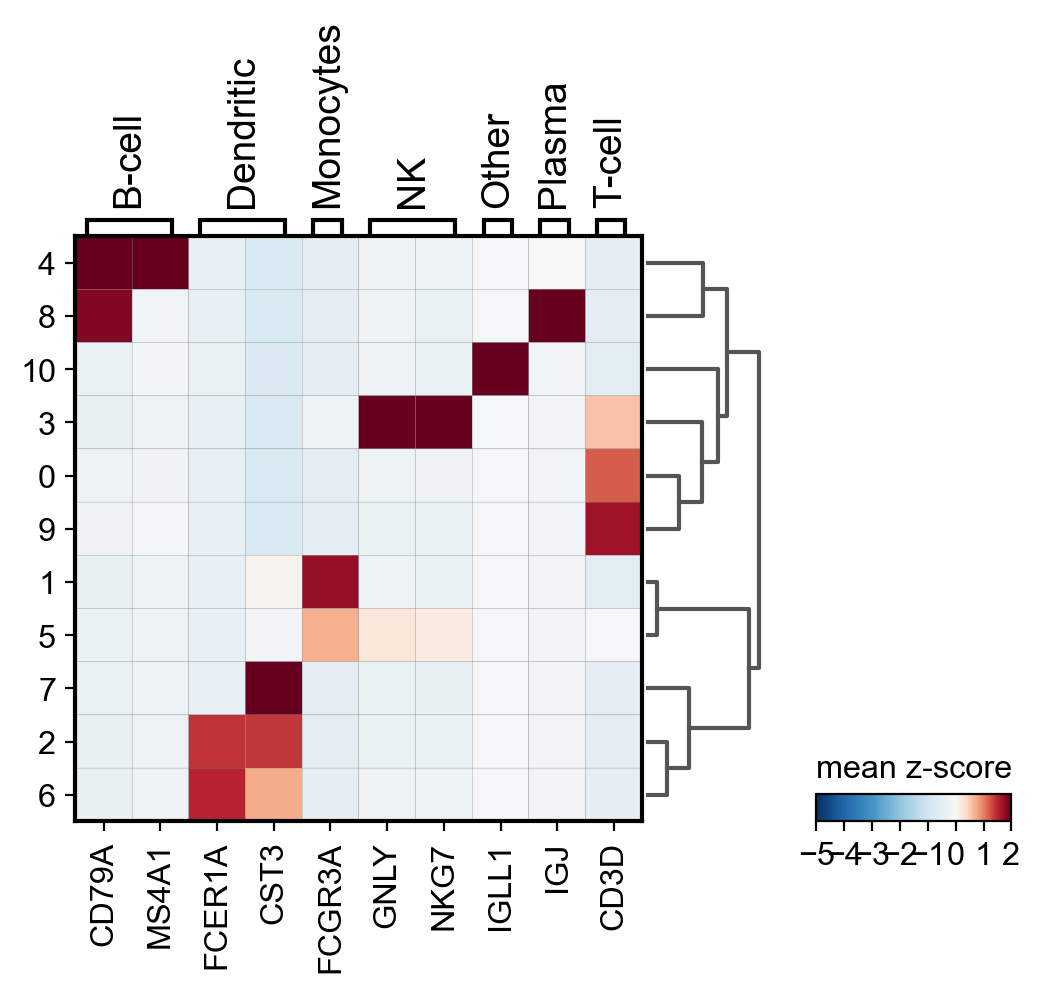

In [6]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'louvain', dendrogram=True, 
                 colorbar_title='mean z-score', layer='scaled', 
                 cmap='RdBu_r', vmin=-5, vcenter=0, vmax=2)

Color scales can also be customized by providing an object of type [matplotlib.color.Normalize](https://matplotlib.org/stable/api/colors_api.html#classes) (e.g. [Normalize](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize), [LogNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LogNorm.html#matplotlib.colors.LogNorm), [TwoSlopeNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html#matplotlib.colors.TwoSlopeNorm)) via the `norm` argument:

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


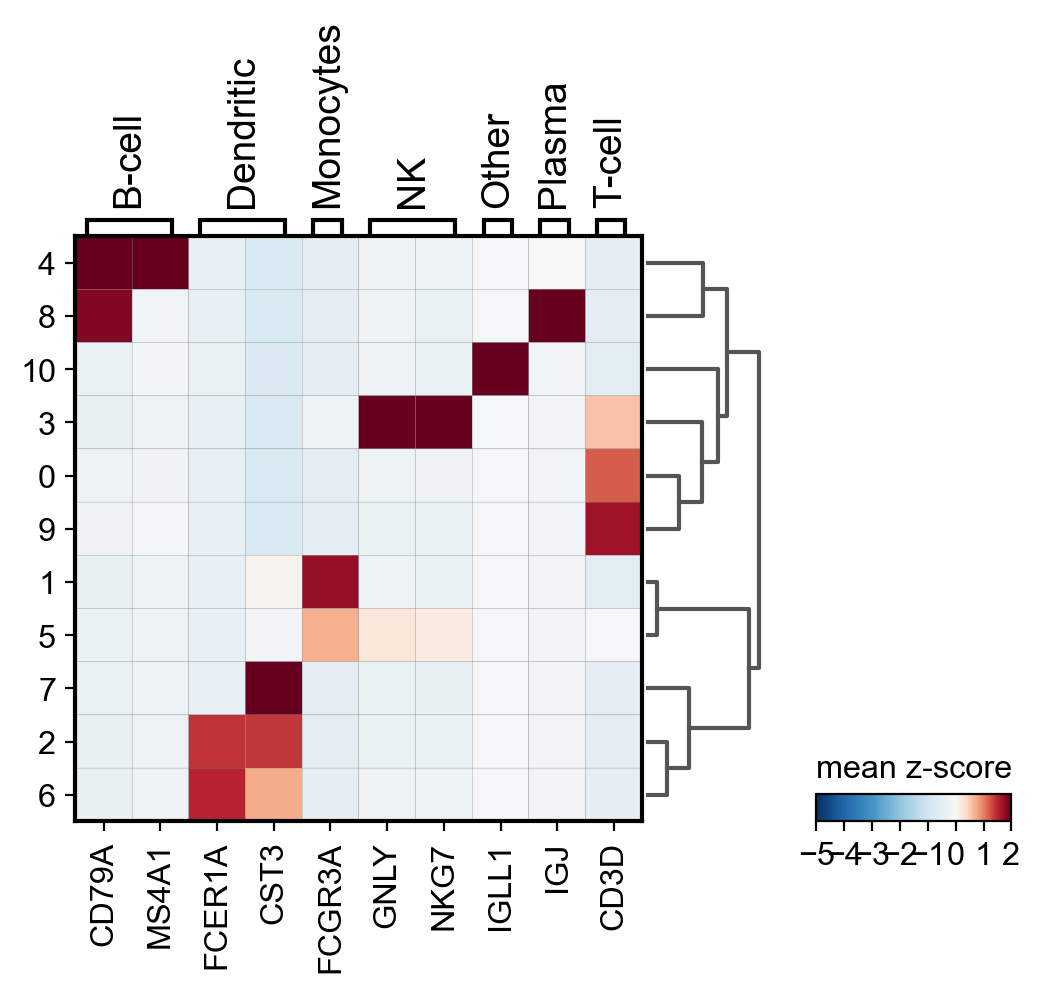

In [7]:
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vcenter=0, vmin=-5, vmax=2)

sc.pl.matrixplot(pbmc, marker_genes_dict, 'louvain', dendrogram=True, 
                 colorbar_title='mean z-score', layer='scaled', norm=norm, cmap='RdBu_r')

vcenter and norm arguments can also be used in embedding plots (e.g. umap) similarly:

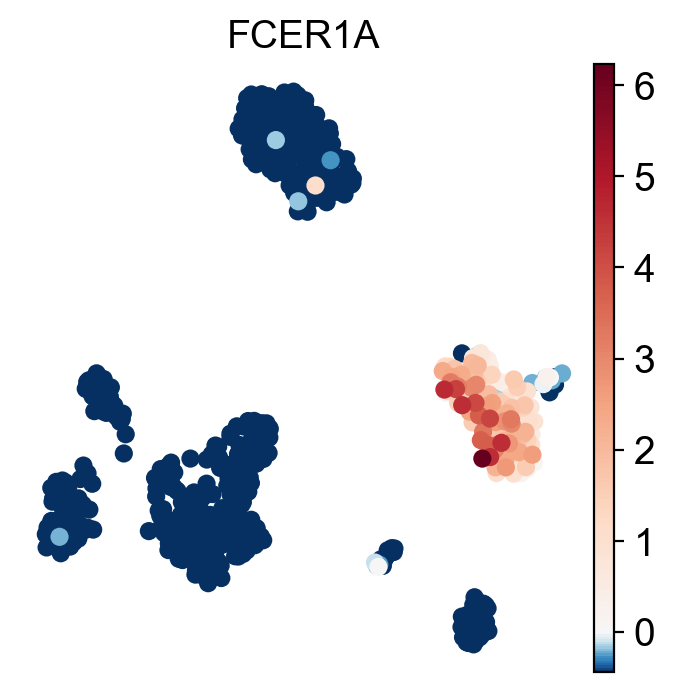

In [8]:
sc.pl.umap(pbmc, color='FCER1A', frameon=False, layer='scaled', cmap='RdBu_r', vcenter=0)

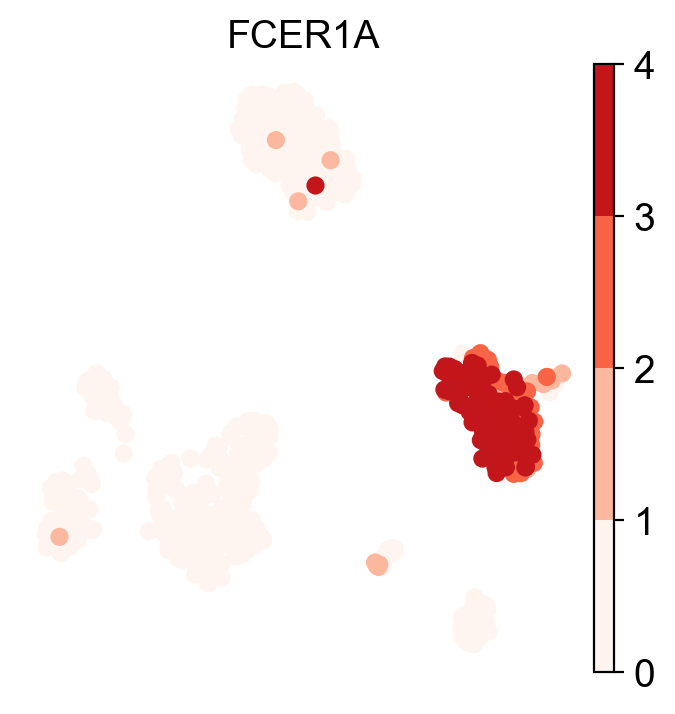

In [9]:
from matplotlib.colors import BoundaryNorm

sc.pl.umap(pbmc, color='FCER1A', frameon=False, norm=BoundaryNorm(ncolors=200, boundaries=[0, 1, 2, 3, 4]), cmap='Reds')